In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip3 install seaborn


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip


In [3]:
data = pd.read_csv('./train/training_data.csv', low_memory=False)

In [4]:
data.shape

(424431, 69)

In [5]:
data.isna().sum()

PolicyNo                    0
Policy_Company              0
Policy_Installment_Term     0
Policy_Billing_Code         0
Policy_Method_Of_Payment    0
                           ..
Claim_Count                 0
Loss_Amount                 0
Frequency                   0
Severity                    0
Loss_Ratio                  0
Length: 69, dtype: int64

In [6]:
unique_counts = data.nunique()
unique_counts


PolicyNo                    424431
Policy_Company                   2
Policy_Installment_Term          2
Policy_Billing_Code              2
Policy_Method_Of_Payment         2
                             ...  
Claim_Count                      6
Loss_Amount                  15891
Frequency                      781
Severity                     15898
Loss_Ratio                    4417
Length: 69, dtype: int64

In [7]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'PolicyNo': [164532941 164533241 164534633 ... 382057400 382162500 382348800]
Unique values in column 'Policy_Company': ['Standard ' 'Preferred']
Unique values in column 'Policy_Installment_Term': [ 6 12]
Unique values in column 'Policy_Billing_Code': ['Direct Billed to Insured' 'Premium Finance']
Unique values in column 'Policy_Method_Of_Payment': ['Pre-paid' 'Installment']
Unique values in column 'Policy_Reinstatement_Fee_Indicator': ['N' 'Y']
Unique values in column 'Policy_Zip_Code_Garaging_Location': ['43046' 'Unknown' '43555' ... '14344' '43191' '82216']
Unique values in column 'Vehicle_Territory': [35 17 27 31 30 32 26 13 16 36 20 37 18 22 15 19]
Unique values in column 'Vehicle_Make_Year': [2004 1980 2005 1985 2002 1991 2001 1995 1997 1998 1990 1986 1992 1996
 1984 1988 2006 1999 2003 2000 1975 1993 1982 1994 2007 1978 1983 1987
 1977 1973 1989 1969 1976 1954 1979 1970 1955 1964 1981 1966 1972 1965
 1971 1961 1962 1967 1968 1974 1960 1952 1953 1940 1963 

In [8]:
numeric_data = data.select_dtypes(include = ['float64', 'int64'])
numeric_data.head()

PolicyNo  Policy_Installment_Term  Vehicle_Territory  Vehicle_Make_Year  \
0  164532941                        6                 35               2004   
1  164533241                        6                 35               1980   
2  164534633                        6                 17               2005   
3  164534839                        6                 17               2005   
4  164534840                        6                 17               2005   

   Vehicle_New_Cost_Amount  Vehicle_Symbol  \
0                       -1              11   
1                       -1              11   
2                       -1              10   
3                       -1              12   
4                       -1              12   

   Vehicle_Number_Of_Drivers_Assigned  Vehicle_Miles_To_Work  \
0                                   1                     -1   
1                                   1                     -1   
2                                   1                     -1   
3                                   1                     -1   
4                                   1                     -1   

   Vehicle_Days_Per_Week_Driven  Vehicle_Age_In_Years  ...  \
0                             5                     3  ...   
1                             5                     9  ...   
2                             5                     2  ...   
3                             5                     2  ...   
4                             5                     2  ...   

   Driver_Total_Upper_Senior_Ages_70_plus  Vehicle_Driver_Points  \
0                                       1                      0   
1                                       1                      0   
2                                       1                      0   
3                                       1                      0   
4                                       1                      0   

   EEA_Policy_Tenure  EEA_PolicyYear  Annual_Premium  Claim_Count  \
0               22.7            2006          320.12            0   
1               47.1            2006          259.70            0   
2               47.2            2006          613.74            0   
3               46.7            2006          541.66            0   
4               47.2            2006          541.66            0   

   Loss_Amount  Frequency  Severity  Loss_Ratio  
0          0.0        0.0       0.0         0.0  
1          0.0        0.0       0.0         0.0  
2          0.0        0.0       0.0         0.0  
3          0.0        0.0       0.0         0.0  
4          0.0        0.0       0.0         0.0  

[5 rows x 42 columns]

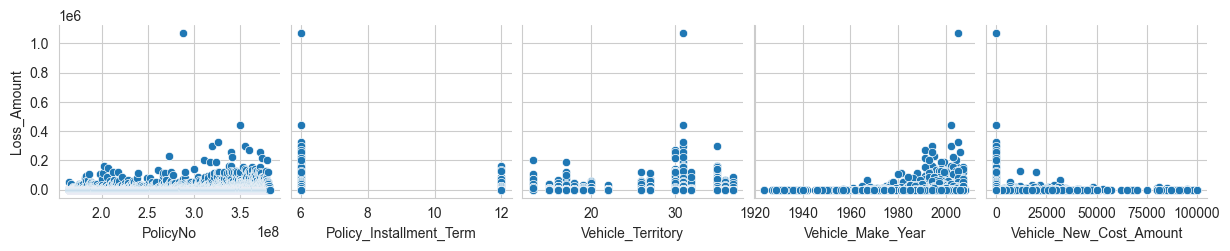

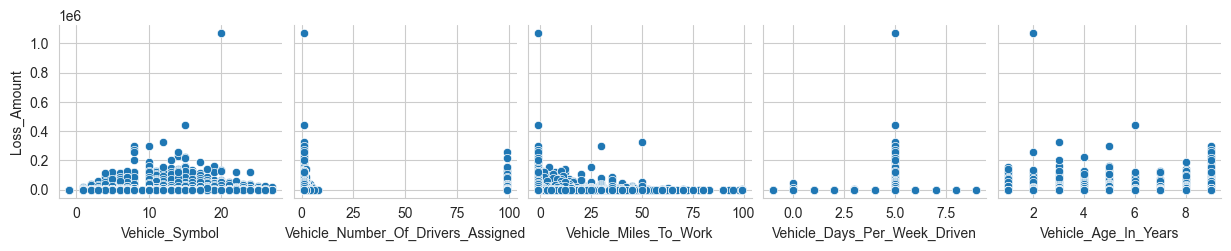

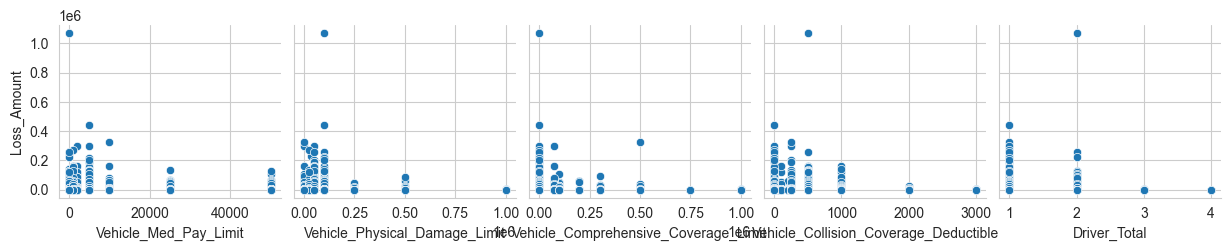

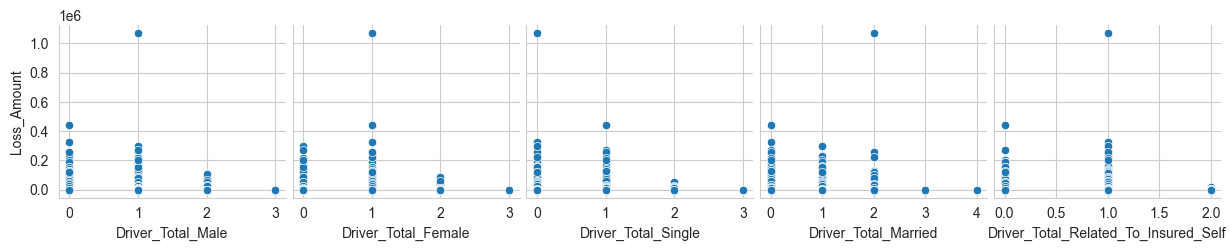

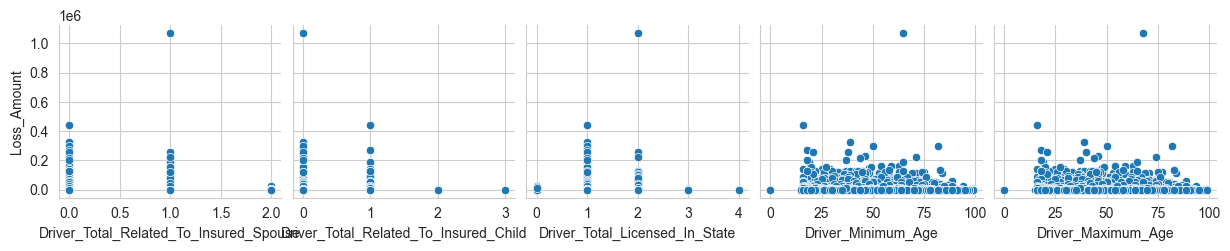

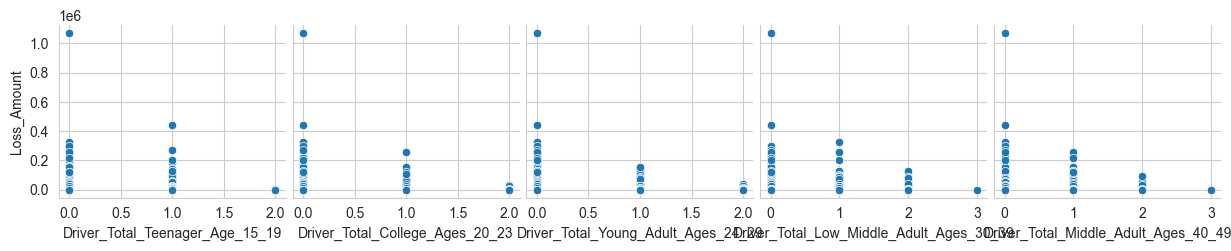

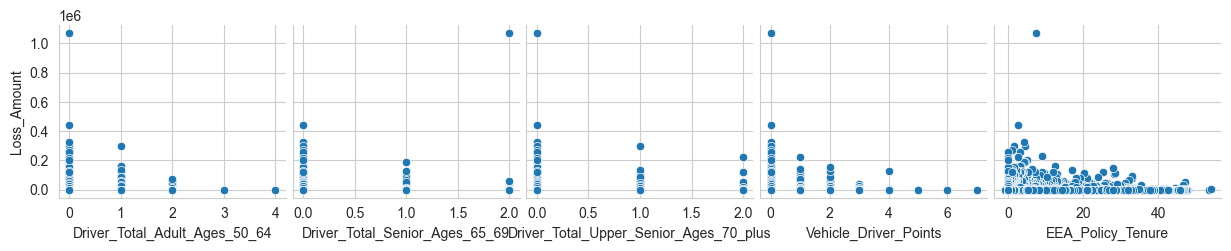

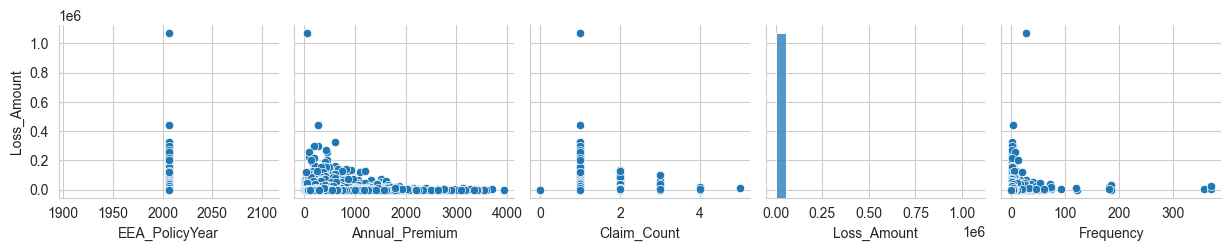

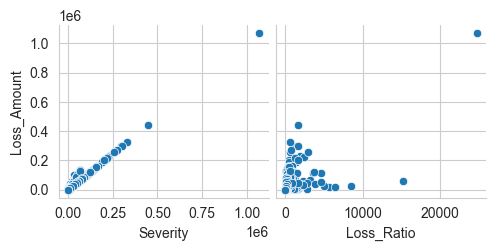

In [9]:
for i in range(0, len(numeric_data.columns), 5):
    sns.pairplot(data=numeric_data,
                 x_vars=numeric_data.columns[i:i+5],
                 y_vars=['Loss_Amount'])
    plt.show()

In [10]:
def get_features(feature_list_file_path):
    with open(feature_list_file_path) as f:
        features_list = f.read().splitlines()
        return features_list

In [11]:
def convert_objects_to_str(df_dataset, df_columns):
    for column in df_columns:
        if df_dataset[column].dtype == 'object':
            df_dataset[column] = df_dataset[column].astype(str)
    return df_dataset

In [12]:
def strip_spaces(input_df):
    columns = list(input_df.columns)
    for column in columns:
        input_df[column] = input_df[column].str.strip()
    return input_df

In [13]:
def get_num_cat_features(df_dataset, df_columns):
    categorical_variables = []
    numerical_variables = []
    for column in df_columns:
        print(column)
        if df_dataset[column].dtype == 'object':
            categorical_variables.append(column)
        else:
            numerical_variables.append(column)
    return numerical_variables, categorical_variables

In [14]:
train_features = [
    'Vehicle_Youthful_Good_Student_Code',
    'Vehicle_Driver_Points',
    'Driver_Total_Female',
    'Driver_Total_Male',
    'Driver_Total_Teenager_Age_15_19',
    'Driver_Total_College_Ages_20_23',
    'Driver_Total_Young_Adult_Ages_24_29',
    'Driver_Total_Low_Middle_Adult_Ages_30_39',
    'Driver_Total_Middle_Adult_Ages_40_49',
    'Driver_Total_Adult_Ages_50_64',
    'Driver_Total_Senior_Ages_65_69',
    'Driver_Total_Upper_Senior_Ages_70_plus',
    'Driver_Total_Married',
    'Driver_Total_Single',
    'Vehicle_Usage',
    'Vehicle_Miles_To_Work',
    'Vehicle_Territory',
    'Annual_Premium',
    'Loss_Amount']

In [15]:
new_data = data[train_features]
num_features, cat_features = get_num_cat_features(new_data, list(new_data.columns))


Vehicle_Youthful_Good_Student_Code
Vehicle_Driver_Points
Driver_Total_Female
Driver_Total_Male
Driver_Total_Teenager_Age_15_19
Driver_Total_College_Ages_20_23
Driver_Total_Young_Adult_Ages_24_29
Driver_Total_Low_Middle_Adult_Ages_30_39
Driver_Total_Middle_Adult_Ages_40_49
Driver_Total_Adult_Ages_50_64
Driver_Total_Senior_Ages_65_69
Driver_Total_Upper_Senior_Ages_70_plus
Driver_Total_Married
Driver_Total_Single
Vehicle_Usage
Vehicle_Miles_To_Work
Vehicle_Territory
Annual_Premium
Loss_Amount


In [16]:
num_features

['Vehicle_Driver_Points',
 'Driver_Total_Female',
 'Driver_Total_Male',
 'Driver_Total_Teenager_Age_15_19',
 'Driver_Total_College_Ages_20_23',
 'Driver_Total_Young_Adult_Ages_24_29',
 'Driver_Total_Low_Middle_Adult_Ages_30_39',
 'Driver_Total_Middle_Adult_Ages_40_49',
 'Driver_Total_Adult_Ages_50_64',
 'Driver_Total_Senior_Ages_65_69',
 'Driver_Total_Upper_Senior_Ages_70_plus',
 'Driver_Total_Married',
 'Driver_Total_Single',
 'Vehicle_Miles_To_Work',
 'Vehicle_Territory',
 'Annual_Premium',
 'Loss_Amount']

In [17]:
cat_features

['Vehicle_Youthful_Good_Student_Code', 'Vehicle_Usage']

In [18]:
new_numeric_data = new_data[num_features]
new_numeric_data.head()

Vehicle_Driver_Points  Driver_Total_Female  Driver_Total_Male  \
0                      0                    1                  0   
1                      0                    1                  0   
2                      0                    0                  1   
3                      0                    0                  1   
4                      0                    0                  1   

   Driver_Total_Teenager_Age_15_19  Driver_Total_College_Ages_20_23  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   Driver_Total_Young_Adult_Ages_24_29  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   Driver_Total_Low_Middle_Adult_Ages_30_39  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Driver_Total_Middle_Adult_Ages_40_49  Driver_Total_Adult_Ages_50_64  \
0                                     0                              0   
1                                     0                              0   
2                                     0                              0   
3                                     0                              0   
4                                     0                              0   

   Driver_Total_Senior_Ages_65_69  Driver_Total_Upper_Senior_Ages_70_plus  \
0                               0                                       1   
1                               0                                       1   
2                               0                                       1   
3                               0                                       1   
4                               0                                       1   

   Driver_Total_Married  Driver_Total_Single  Vehicle_Miles_To_Work  \
0                     0                    0                     -1   
1                     1                    0                     -1   
2                     1                    0                     -1   
3                     1                    0                     -1   
4                     1                    0                     -1   

   Vehicle_Territory  Annual_Premium  Loss_Amount  
0                 35          320.12          0.0  
1                 35          259.70          0.0  
2                 17          613.74          0.0  
3                 17          541.66          0.0  
4                 17          541.66          0.0

In [19]:
new_categoric_data = new_data[cat_features]
new_categoric_data

Vehicle_Youthful_Good_Student_Code Vehicle_Usage
0       Not Eligible for Good Student Credit      Farm    
1       Not Eligible for Good Student Credit      Farm    
2       Not Eligible for Good Student Credit      Pleasure
3       Not Eligible for Good Student Credit      Pleasure
4       Not Eligible for Good Student Credit      Pleasure
...                                      ...           ...
424426  Not Eligible for Good Student Credit      Pleasure
424427  Not Eligible for Good Student Credit      Pleasure
424428  Not Eligible for Good Student Credit      Pleasure
424429  Not Eligible for Good Student Credit      Pleasure
424430  Not Eligible for Good Student Credit      Work    

[424431 rows x 2 columns]

In [20]:
new_categoric_data['Vehicle_Usage'].unique()

array(['Farm    ', 'Pleasure', 'Work    ', 'Business'], dtype=object)

In [21]:
new_categoric_data_strip = strip_spaces(new_categoric_data)
new_categoric_data_strip

/var/folders/cz/83bmkzk159z0bcx0cnf5ty6w0000gn/T/ipykernel_24768/90014629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df[column] = input_df[column].str.strip()


Vehicle_Youthful_Good_Student_Code Vehicle_Usage
0       Not Eligible for Good Student Credit          Farm
1       Not Eligible for Good Student Credit          Farm
2       Not Eligible for Good Student Credit      Pleasure
3       Not Eligible for Good Student Credit      Pleasure
4       Not Eligible for Good Student Credit      Pleasure
...                                      ...           ...
424426  Not Eligible for Good Student Credit      Pleasure
424427  Not Eligible for Good Student Credit      Pleasure
424428  Not Eligible for Good Student Credit      Pleasure
424429  Not Eligible for Good Student Credit      Pleasure
424430  Not Eligible for Good Student Credit          Work

[424431 rows x 2 columns]

In [22]:
clean_data = new_numeric_data.join(new_categoric_data)
clean_data.head()

Vehicle_Driver_Points  Driver_Total_Female  Driver_Total_Male  \
0                      0                    1                  0   
1                      0                    1                  0   
2                      0                    0                  1   
3                      0                    0                  1   
4                      0                    0                  1   

   Driver_Total_Teenager_Age_15_19  Driver_Total_College_Ages_20_23  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   Driver_Total_Young_Adult_Ages_24_29  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   Driver_Total_Low_Middle_Adult_Ages_30_39  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Driver_Total_Middle_Adult_Ages_40_49  Driver_Total_Adult_Ages_50_64  \
0                                     0                              0   
1                                     0                              0   
2                                     0                              0   
3                                     0                              0   
4                                     0                              0   

   Driver_Total_Senior_Ages_65_69  Driver_Total_Upper_Senior_Ages_70_plus  \
0                               0                                       1   
1                               0                                       1   
2                               0                                       1   
3                               0                                       1   
4                               0                                       1   

   Driver_Total_Married  Driver_Total_Single  Vehicle_Miles_To_Work  \
0                     0                    0                     -1   
1                     1                    0                     -1   
2                     1                    0                     -1   
3                     1                    0                     -1   
4                     1                    0                     -1   

   Vehicle_Territory  Annual_Premium  Loss_Amount  \
0                 35          320.12          0.0   
1                 35          259.70          0.0   
2                 17          613.74          0.0   
3                 17          541.66          0.0   
4                 17          541.66          0.0   

     Vehicle_Youthful_Good_Student_Code Vehicle_Usage  
0  Not Eligible for Good Student Credit          Farm  
1  Not Eligible for Good Student Credit          Farm  
2  Not Eligible for Good Student Credit      Pleasure  
3  Not Eligible for Good Student Credit      Pleasure  
4  Not Eligible for Good Student Credit      Pleasure

In [23]:
test_features = ['Vehicle_Make_Year',
                          'Vehicle_Number_Of_Drivers_Assigned',
                          'Vehicle_Age_In_Years',
                          'Driver_Total_Single',
                          'Driver_Total',
                          'Driver_Total_Male',
                          'Driver_Total_Female',
                          'Driver_Total_Married',
                          'Driver_Total_Teenager_Age_15_19',
                          'Driver_Total_College_Ages_20_23',
                          'Driver_Total_Young_Adult_Ages_24_29',
                          'Driver_Total_Upper_Senior_Ages_70_plus',
                          'Vehicle_Usage',
                          'Vehicle_Anti_Theft_Device',
                          'Vehicle_Performance',
                          'Annual_Premium']

In [24]:
policies_in_portfolios = [1000, 3000, 5000]
percentage_loss = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]
data_portfolio = []

In [25]:
dataframe = pd.get_dummies(new_data)
dataframe.head()


Vehicle_Driver_Points  Driver_Total_Female  Driver_Total_Male  \
0                      0                    1                  0   
1                      0                    1                  0   
2                      0                    0                  1   
3                      0                    0                  1   
4                      0                    0                  1   

   Driver_Total_Teenager_Age_15_19  Driver_Total_College_Ages_20_23  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   Driver_Total_Young_Adult_Ages_24_29  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   Driver_Total_Low_Middle_Adult_Ages_30_39  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Driver_Total_Middle_Adult_Ages_40_49  Driver_Total_Adult_Ages_50_64  \
0                                     0                              0   
1                                     0                              0   
2                                     0                              0   
3                                     0                              0   
4                                     0                              0   

   Driver_Total_Senior_Ages_65_69  ...  Vehicle_Miles_To_Work  \
0                               0  ...                     -1   
1                               0  ...                     -1   
2                               0  ...                     -1   
3                               0  ...                     -1   
4                               0  ...                     -1   

   Vehicle_Territory  Annual_Premium  Loss_Amount  \
0                 35          320.12          0.0   
1                 35          259.70          0.0   
2                 17          613.74          0.0   
3                 17          541.66          0.0   
4                 17          541.66          0.0   

   Vehicle_Youthful_Good_Student_Code_Eligible for Good Student Credit      \
0                                              False                         
1                                              False                         
2                                              False                         
3                                              False                         
4                                              False                         

   Vehicle_Youthful_Good_Student_Code_Not Eligible for Good Student Credit  \
0                                               True                         
1                                               True                         
2                                               True                         
3                                               True                         
4                                               True                         

   Vehicle_Usage_Business  Vehicle_Usage_Farm      Vehicle_Usage_Pleasure  \
0                   False                    True                   False   
1                   False                    True                   False   
2                   False                   False                    True   
3                   False                   False                    True   
4                   False                   False                    True   

   Vehicle_Usage_Work      
0                   False  
1                  

In [26]:
dataframe_columns = list(dataframe.columns)

In [27]:
for i in range(10):
    df_data = dataframe.sample(frac=1)
    df_data_loss_zero = df_data[df_data['Loss_Amount'] == 0]
    df_data_loss_non_zero = df_data[df_data['Loss_Amount'] != 0]
    current_df_without_loss = 0
    current_df_with_loss = 0
    for i in range(len(policies_in_portfolios)):
        for j in range(len(percentage_loss)):
            without_loss_size = int(((100 - percentage_loss[j])/100) * policies_in_portfolios[i])
            with_loss_size = int(policies_in_portfolios[i] - without_loss_size )

            df_without_loss = df_data_loss_zero.iloc[current_df_without_loss: current_df_without_loss + without_loss_size]
            df_with_loss = df_data_loss_non_zero.iloc[current_df_with_loss: current_df_with_loss + with_loss_size]

            current_df_without_loss = current_df_without_loss + without_loss_size
            current_df_with_loss = current_df_with_loss + with_loss_size

            df_merge = pd.concat([df_without_loss, df_with_loss])
            data_portfolio.append(df_merge)

len(data_portfolio)

330

In [28]:
data_portfolio[1]

Vehicle_Driver_Points  Driver_Total_Female  Driver_Total_Male  \
370128                      0                    0                  1   
135087                      0                    0                  1   
177172                      0                    1                  0   
33049                       0                    1                  1   
278682                      0                    1                  0   
...                       ...                  ...                ...   
483                         0                    1                  0   
120966                      0                    0                  1   
200126                      0                    1                  0   
12029                       0                    1                  0   
337536                      0                    1                  0   

        Driver_Total_Teenager_Age_15_19  Driver_Total_College_Ages_20_23  \
370128                                0                                0   
135087                                0                                0   
177172                                0                                0   
33049                                 0                                0   
278682                                0                                0   
...                                 ...                              ...   
483                                   0                                0   
120966                                0                                0   
200126                                0                                0   
12029                                 0                                0   
337536                                0                                0   

        Driver_Total_Young_Adult_Ages_24_29  \
370128                                    0   
135087                                    0   
177172                                    0   
33049                                     0   
278682                                    0   
...                                     ...   
483                                       1   
120966                                    0   
200126                                    0   
12029                                     0   
337536                                    1   

        Driver_Total_Low_Middle_Adult_Ages_30_39  \
370128                                         0   
135087                                         0   
177172                                         0   
33049                                          0   
278682                                         1   
...                                          ...   
483                                            0   
120966                                         0   
200126                                         0   
12029                                          0   
337536                                         0   

        Driver_Total_Middle_Adult_Ages_40_49  Driver_Total_Adult_Ages_50_64  \
370128                                     0                              0   
135087                                     0                              0   
177172                                     0                              1   
33049                                      0                              2   
278682                                     0                              0   
...                                      ...                            ...   
483                                        0                              0   
120966                                     0                              1   
200126                                     1                              0   
12029                                      0                              1   
337536                                     0                              0   

        Driver_Total_Senior_Ages_65_69  ...  Vehicle_Miles_To_Work  \
370128   

In [29]:
final_data = None

In [30]:
selected_features_mean = num_features.copy()
selected_features_mean.remove('Annual_Premium')
selected_features_mean.remove('Loss_Amount')
mean_columns = selected_features_mean

sum_columns = ['Annual_Premium']

for cat_f in cat_features:
    for col in list(data_portfolio[0].columns):
        if col.startswith(cat_f):
            sum_columns.append(col)

target_column = ['Loss_Amount']

In [31]:
sum_columns

['Annual_Premium',
 'Vehicle_Youthful_Good_Student_Code_Eligible for Good Student Credit    ',
 'Vehicle_Youthful_Good_Student_Code_Not Eligible for Good Student Credit',
 'Vehicle_Usage_Business',
 'Vehicle_Usage_Farm    ',
 'Vehicle_Usage_Pleasure',
 'Vehicle_Usage_Work    ']

In [32]:
final_train = []

In [33]:
def portfolio_to_features(df_portfolio, is_training=True):
    df_portfolio_mean = df_portfolio[mean_columns]
    df_portfolio_mean = df_portfolio_mean.mean()
    ls_portfolio_mean = df_portfolio_mean.to_list()

    df_portfolio_sum = df_portfolio[sum_columns]
    df_portfolio_sum = df_portfolio_sum.sum()
    ls_portfolio_sum = df_portfolio_sum.to_list()

    if is_training:
        df_portfolio_target = df_portfolio[target_column]
        df_portfolio_target_sum = df_portfolio_target.sum()
        ls_portfolio_target_sum = df_portfolio_target_sum.to_list()

    list_merge = ls_portfolio_mean + ls_portfolio_sum

    if is_training:
        list_merge = list_merge + ls_portfolio_target_sum

    return list_merge

In [34]:
def features_to_train(df_portfolios_list):
    features_list = mean_columns + sum_columns + target_column
    final_list = []
    for single_portfolio in df_portfolios_list:
        ls_portfolio = portfolio_to_features(single_portfolio)
        final_list.append(ls_portfolio)
    df_final_training = pd.DataFrame(final_list, columns = features_list)
    return df_final_training

In [35]:
data_final_train = features_to_train(data_portfolio)

data_final_train

Vehicle_Driver_Points  Driver_Total_Female  Driver_Total_Male  \
0                   0.1180               0.5840             0.5240   
1                   0.1010               0.5820             0.5290   
2                   0.1320               0.5570             0.5600   
3                   0.1240               0.5900             0.5290   
4                   0.1090               0.5770             0.5430   
..                     ...                  ...                ...   
325                 0.1298               0.5752             0.5406   
326                 0.1234               0.5734             0.5424   
327                 0.1322               0.5874             0.5262   
328                 0.1272               0.5854             0.5310   
329                 0.1246               0.5968             0.5210   

     Driver_Total_Teenager_Age_15_19  Driver_Total_College_Ages_20_23  \
0                             0.0340                           0.0410   
1                             0.0270                           0.0470   
2                             0.0430                           0.0550   
3                             0.0470                           0.0560   
4                             0.0320                           0.0430   
..                               ...                              ...   
325                           0.0444                           0.0470   
326                           0.0414                           0.0486   
327                           0.0452                           0.0488   
328                           0.0366                           0.0480   
329                           0.0476                           0.0508   

     Driver_Total_Young_Adult_Ages_24_29  \
0                                 0.0900   
1                                 0.0810   
2                                 0.0810   
3                                 0.0770   
4                                 0.0850   
..                                   ...   
325                               0.0912   
326                               0.0912   
327                               0.0892   
328                               0.0900   
329                               0.0946   

     Driver_Total_Low_Middle_Adult_Ages_30_39  \
0                                      0.2200   
1                                      0.2020   
2                                      0.2030   
3                                      0.1980   
4                                      0.2050   
..                                        ...   
325                                    0.2118   
326                                    0.2170   
327                                    0.2180   
328                                    0.2016   
329                                    0.2138   

     Driver_Total_Middle_Adult_Ages_40_49  Driver_Total_Adult_Ages_50_64  \
0                                  0.2580                         0.3080   
1                                  0.2870                         0.3200   
2                                  0.2980                         0.3070   
3                                  0.2940                         0.2880   
4                                  0.2650                         0.3210   
..                                    ...                            ...   
325                                0.2620                         0.3092   
326                                0.2520                         0.3078   
327                                0.2532                         0.3104   
328                                0.2830                         0.3084   
329                                0.2674                         0.2986   

     Driver_Total_Senior_Ages_65_69  ...  Vehicle_Miles_To_Work  \
0                            0.0650  ...                 3.0280   
1                            0.0550  ...                 3.5370   
2                            0.0460  ...               

***Modeling***


In [36]:
X_train = data_final_train.loc[:, data_final_train.columns != 'Loss_Amount']
y_train = data_final_train['Loss_Amount']
print(X_train.shape, y_train.shape)

(330, 22) (330,)


In [37]:
!pip3 install xgboost


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip


In [38]:
from xgboost import XGBRegressor
xgb = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.01, max_depth = 3, alpha = 10, n_estimators = 100)
xgb.fit(np.nan_to_num(X_train.to_numpy()), y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [39]:
y_train_pred_xgb = xgb.predict(np.nan_to_num(X_train.to_numpy()))
y_train_pred_xgb


array([ 601027.94,  612627.6 ,  595923.4 ,  656009.8 ,  592862.  ,
        628679.1 ,  614499.6 ,  694448.3 ,  736752.4 ,  679264.9 ,
        873371.  ,  995596.75,  880134.4 ,  849547.75,  919011.75,
        956897.1 , 1385783.  , 1105286.2 , 1197610.6 , 1427983.1 ,
       1170034.1 , 1716619.8 , 1105590.6 , 1253751.9 , 1225013.2 ,
       1257464.2 , 1187987.5 , 1188671.9 , 1332185.2 , 1286905.8 ,
       1674048.8 , 1515781.  , 3246501.  ,  606521.3 ,  674759.2 ,
        641605.7 ,  589040.56,  676090.6 ,  621853.  ,  591758.44,
        605035.56,  639372.4 ,  592620.9 ,  762761.56,  954510.8 ,
        832604.  ,  892305.8 ,  925501.6 ,  997551.  , 1048815.8 ,
       1117466.4 , 1094802.5 , 1366888.2 , 1196494.6 , 1344027.1 ,
       1136789.1 , 1155665.  , 1182873.8 , 1259989.8 , 1317000.6 ,
       1271810.1 , 1412481.  , 1503193.4 , 1483884.9 , 1718397.6 ,
       3041274.5 ,  621415.7 ,  631641.06,  672129.56,  611963.9 ,
        621915.75,  610676.8 ,  617598.44,  617808.6 ,  726268

In [40]:
from sklearn.metrics import mean_absolute_error
mae_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
mae_xgb

529752.574689394

In [41]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(5)
knn_regressor.fit(np.nan_to_num(X_train.to_numpy()), y_train)

KNeighborsRegressor()

In [42]:
y_train

0        55485.54
1        48210.99
2       111017.70
3       141621.33
4       289564.46
          ...    
325    1525126.82
326    1644441.77
327    1862191.26
328    2627423.68
329    5456701.43
Name: Loss_Amount, Length: 330, dtype: float64

In [43]:
y_train_pred_knn = knn_regressor.predict(np.nan_to_num(X_train.to_numpy()))
y_train_pred_knn

array([ 189650.78 ,  174466.534,  211151.268,  276059.12 ,  332215.856,
        181824.504,  370796.308,  819476.068,  601561.03 ,  402492.256,
        840335.532,  652479.156,  377015.804,  546208.88 , 1110562.522,
        420856.176, 1402248.98 ,  951578.766, 1297275.31 , 1464552.992,
       1402248.98 , 3166634.668,  719878.58 ,  870751.644, 1732179.356,
       1730606.164,  725725.928, 1255260.216, 1863745.668, 1898384.034,
       2421404.346, 1567827.388, 5300408.746,  239170.214,  357917.702,
        199079.34 ,  199079.34 ,  290603.93 ,  276059.12 ,  311131.834,
        339282.866,  329034.47 ,  262046.864,  521003.022,  689392.796,
        614817.266,  314219.098,  802380.796,  778736.078,  837086.384,
        986759.332,  500396.728, 1345313.864, 1028695.948, 2702722.206,
        991358.748,  870751.644, 1169390.704,  628921.394, 1863745.668,
       1567827.388, 1585706.066, 2144484.516, 2434513.098, 2057076.08 ,
       5414786.504,  260706.89 ,  181824.504,  393810.184,  1979

In [44]:
mae_knn = mean_absolute_error(y_train, y_train_pred_knn)
mae_knn

313388.2050363636

In [45]:
import numpy as np

def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(y_train, y_train_pred_knn)

75.39439094167565

In [46]:
import os
import collections
def load_test_portfolios():
    path_testing_dataset = "./test/testing_portfolios"
    portfolio_files = os.listdir(path_testing_dataset)
    portfolio_dict = {}
    for i in range(len(portfolio_files)):
        portfolio_id = int(portfolio_files[i].split('.')[0][15:])
        portfolio_dict[portfolio_id] = portfolio_files[i]
    od = collections.OrderedDict(sorted(portfolio_dict.items()))
    po_list = []
    for key,val in od.items():
        po_list.append(val)
    df_portfolio_list = []
    for portfolio_file in po_list:
        file_path = os.path.join(path_testing_dataset, portfolio_file)
        df_test_portfolio = pd.read_csv(file_path)
        test_num_features = num_features.copy()
        test_num_features.remove('Loss_Amount')

        df_test_num = df_test_portfolio[test_num_features]
        df_test_cat = df_test_portfolio[cat_features]
        df_test_cat_strip = strip_spaces(df_test_cat)
        df_test_portfolio = df_test_num.join(df_test_cat_strip, how='outer')
        df_test_portfolio = pd.get_dummies(df_test_portfolio)
        df_test_portfolio = df_test_portfolio.reindex(sorted(X_train.columns), axis=1)
        df_portfolio_list.append(df_test_portfolio)

    result_dict = collections.OrderedDict()
    for i in range(len(po_list)):
        portfolio_id = po_list[i].split('.')[0][5:]
        result_dict[portfolio_id] = df_portfolio_list[i]
    return result_dict

In [47]:
def features_to_testing_df(df_portfolios_ordered_dict):
    features_list = mean_columns + sum_columns
    features_list.insert(0, 'ID')
    final_list = []
    for portfolio_id, single_portfolio in df_portfolios_ordered_dict.items():
        ls_portfolio = portfolio_to_features(single_portfolio, False)
        ls_portfolio.insert(0, portfolio_id)
        final_list.append(ls_portfolio)
    df_final_testing = pd.DataFrame(final_list, columns = features_list)
    return df_final_testing

In [48]:
test_portfolios_dict = load_test_portfolios()

/var/folders/cz/83bmkzk159z0bcx0cnf5ty6w0000gn/T/ipykernel_24768/90014629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df[column] = input_df[column].str.strip()
/var/folders/cz/83bmkzk159z0bcx0cnf5ty6w0000gn/T/ipykernel_24768/90014629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df[column] = input_df[column].str.strip()
/var/folders/cz/83bmkzk159z0bcx0cnf5ty6w0000gn/T/ipykernel_24768/90014629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [49]:
test_portfolios_dict

OrderedDict([('portfolio_1',
                   Annual_Premium  Driver_Total_Adult_Ages_50_64  \
              0            203.52                              0   
              1            101.76                              0   
              2            198.22                              1   
              3            447.32                              0   
              4            172.78                              0   
              ..              ...                            ...   
              995          157.94                              0   
              996          188.68                              1   
              997          504.56                              0   
              998          320.12                              0   
              999          624.34                              0   
              
                   Driver_Total_College_Ages_20_23  Driver_Total_Female  \
              0                                  0               

In [50]:
for key, value in test_portfolios_dict.items():
    print(key, value.shape)

portfolio_1 (1000, 22)
portfolio_2 (999, 22)
portfolio_3 (1000, 22)
portfolio_4 (997, 22)
portfolio_5 (998, 22)
portfolio_6 (1000, 22)
portfolio_7 (1000, 22)
portfolio_8 (998, 22)
portfolio_9 (998, 22)
portfolio_10 (998, 22)
portfolio_11 (1000, 22)
portfolio_12 (999, 22)
portfolio_13 (999, 22)
portfolio_14 (997, 22)
portfolio_15 (1000, 22)
portfolio_16 (999, 22)
portfolio_17 (998, 22)
portfolio_18 (999, 22)
portfolio_19 (998, 22)
portfolio_20 (997, 22)
portfolio_21 (1000, 22)
portfolio_22 (999, 22)
portfolio_23 (1000, 22)
portfolio_24 (1000, 22)
portfolio_25 (998, 22)
portfolio_26 (1000, 22)
portfolio_27 (998, 22)
portfolio_28 (999, 22)
portfolio_29 (998, 22)
portfolio_30 (998, 22)
portfolio_41 (1000, 22)
portfolio_42 (1000, 22)
portfolio_43 (998, 22)
portfolio_44 (999, 22)
portfolio_45 (999, 22)
portfolio_46 (999, 22)
portfolio_47 (998, 22)
portfolio_48 (1000, 22)
portfolio_49 (999, 22)
portfolio_50 (999, 22)
portfolio_51 (999, 22)
portfolio_52 (998, 22)
portfolio_53 (996, 22)
portfol

In [51]:
df_test_final = features_to_testing_df(test_portfolios_dict)
df_test_final

ID  Vehicle_Driver_Points  Driver_Total_Female  \
0      portfolio_1               0.110000             0.595000   
1      portfolio_2               0.095095             0.553554   
2      portfolio_3               0.121000             0.587000   
3      portfolio_4               0.127382             0.581745   
4      portfolio_5               0.132265             0.569138   
..             ...                    ...                  ...   
325  portfolio_596               0.126692             0.584967   
326  portfolio_597               0.134464             0.596406   
327  portfolio_598               0.124646             0.589033   
328  portfolio_599               0.128459             0.593617   
329  portfolio_600               0.120324             0.606067   

     Driver_Total_Male  Driver_Total_Teenager_Age_15_19  \
0             0.533000                         0.040000   
1             0.574575                         0.032032   
2             0.544000                         0.044000   
3             0.539619                         0.052156   
4             0.549098                         0.042084   
..                 ...                              ...   
325           0.529198                         0.042231   
326           0.519685                         0.045427   
327           0.527924                         0.051801   
328           0.523329                         0.043224   
329           0.507988                         0.038220   

     Driver_Total_College_Ages_20_23  Driver_Total_Young_Adult_Ages_24_29  \
0                           0.044000                             0.080000   
1                           0.051051                             0.100100   
2                           0.047000                             0.085000   
3                           0.040120                             0.087262   
4                           0.052104                             0.085170   
..                               ...                                  ...   
325                         0.052132                             0.088503   
326                         0.047244                             0.092873   
327                         0.046742                             0.096115   
328                         0.053121                             0.085437   
329                         0.048534                             0.099292   

     Driver_Total_Low_Middle_Adult_Ages_30_39  \
0                                    0.218000   
1                                    0.212212   
2                                    0.216000   
3                                    0.200602   
4                                    0.210421   
..                                        ...   
325                                  0.209739   
326                                  0.219059   
327                                  0.209025   
328                                  0.207635   
329                                  0.218807   

     Driver_Total_Middle_Adult_Ages_40_49  Driver_Total_Adult_Ages_50_64  ...  \
0                                0.274000                       0.326000  ...   
1                                0.252252                       0.327327  ...   
2                                0.287000                       0.302000  ...   
3                                0.267803                       0.315948  ...   
4                                0.266533                       0.314629  ...   
..                                    ...                            ...  ...   
325                              0.271166                       0.306931  ...   
326                              0.263679                       0.299414  ...   
327                              0.268312                       0.295629  ...   
328                              0.271258                       0.295698  ...   
329                              0.260263                       0.295248  ...   

     Driver_Total_Single  V

In [52]:
def generate_test_results(regressor, X_test, output_dir):
    result_data = collections.OrderedDict()
    portfolio_ids_df = X_test.iloc[:, 0:1]
    X_test_features = X_test.iloc[:, 1:]

    y_pred = regressor.predict(np.nan_to_num(X_test_features.to_numpy()))
    loss_ratio = y_pred/X_test['Annual_Premium']
    loss_ratio_log = np.log(loss_ratio)
    loss_ratio_log_df = loss_ratio_log.to_frame(name='ln_LR')
    result_df = portfolio_ids_df.join(loss_ratio_log_df, how='outer')

    result_df.to_csv('predictions_xgb.csv', index=False)

generate_test_results(knn_regressor, df_test_final, '')